In [1]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.4 MB 60.9 MB/s eta 0:00:01
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408188 sha256=0d490f2bee6fd29e9876d4d5cea6a4edeb8a83902fe7566d3cb84c84451060f3
  Stored in directory: /home/featurize/.cache/pip/wheels/65/ed/30/de4e48d9fb8a4760c85a17d2dc4d2405d7c0dcbbfc54b46b1b
Successfully built visdom


In [ ]:
!python -m visdom.server

In [ ]:
!start http://localhost:8097/

In [ ]:
!python train.py --dataroot ./datasets/GMM_SO1_32_3e-1/ --name GMM_SO1_x32_noisy --no_flip --norm batch --model vec2pic --dataset_mode vec2pic --load_size 32 --crop_size 32 --sig 0.3 --netD_pic n_layers --n_layers_D 3 --display_freq 5 --n_epochs 200 --lr 1e-5 --netG ffnet_n_layers --n_layers_G 15

----------------- Options ---------------
               batch_size: 32                            
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 32                            	[default: 64]
                 dataroot: ./datasets/GMM_SO1_32_3e-1/   	[default: None]
             dataset_mode: vec2pic                       	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 5                             	[default: 0]
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: lat

In [40]:
!python create_test.py --dataroot ./datasets/GMM_SO1_32_3e-1/ --name GMM_SO1_x32_noisy --norm batch --model vec2pic --dataset_mode vec2pic --load_size 32 --crop_size 32 --netG ffnet_n_layers --n_layers_G 15 --batch_size 540 --no_flip --gpu_ids -1

----------------- Options ---------------
               batch_size: 540                           	[default: 32]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 32                            	[default: 64]
                 dataroot: ./datasets/GMM_SO1_32_3e-1/   	[default: None]
             dataset_mode: vec2pic                       	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 0                             
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: la

In [1]:
import os
import torch
# define a function to load the model and dataset from dir
def load_model_and_dataset(dir):
    G_A = torch.load(os.path.join(dir, 'netG_A.pth'))
    G_B = torch.load(os.path.join(dir, 'netG_B.pth'))
    dataset = torch.load(os.path.join(dir, 'dataset.pth'))
    return G_A, G_B, dataset

In [2]:
G_A, G_B, dataset = load_model_and_dataset('./results/GMM_SO1_x32_noisy')
import numpy as np
import matplotlib.pyplot as plt

for batch in dataset:
        pass
images_tensor = batch['B']
n = images_tensor.size(0)
images = images_tensor.reshape(n, 32, 32).detach().numpy()
images = images[0:49]

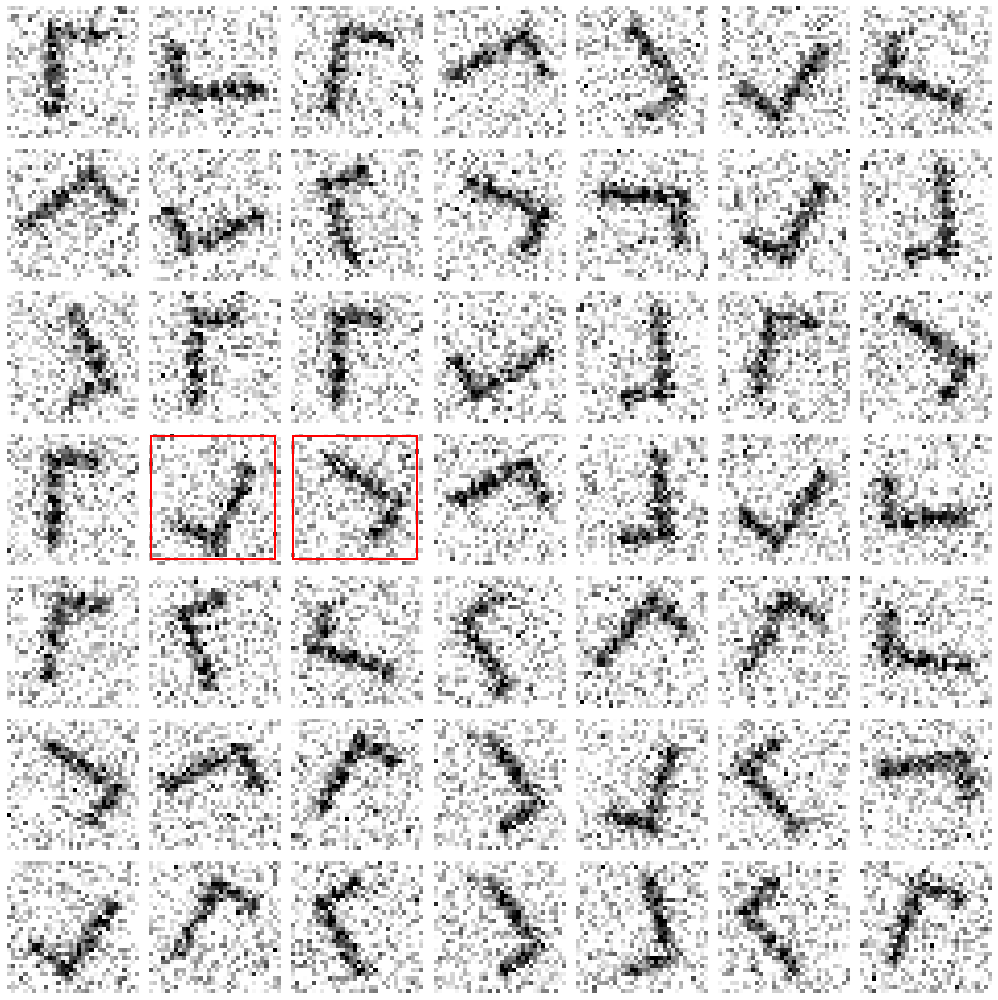

In [14]:
import matplotlib.patches as patches

fig, axs = plt.subplots(7, 7, figsize=(14, 14))

# Iterate over the images and plot them
for i, ax in enumerate(axs.flatten()):
    # Plot each image in grayscale
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    if i in [22,23]:
        rect = patches.Rectangle((0, 0), 30, 30, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.tight_layout()
plt.show()

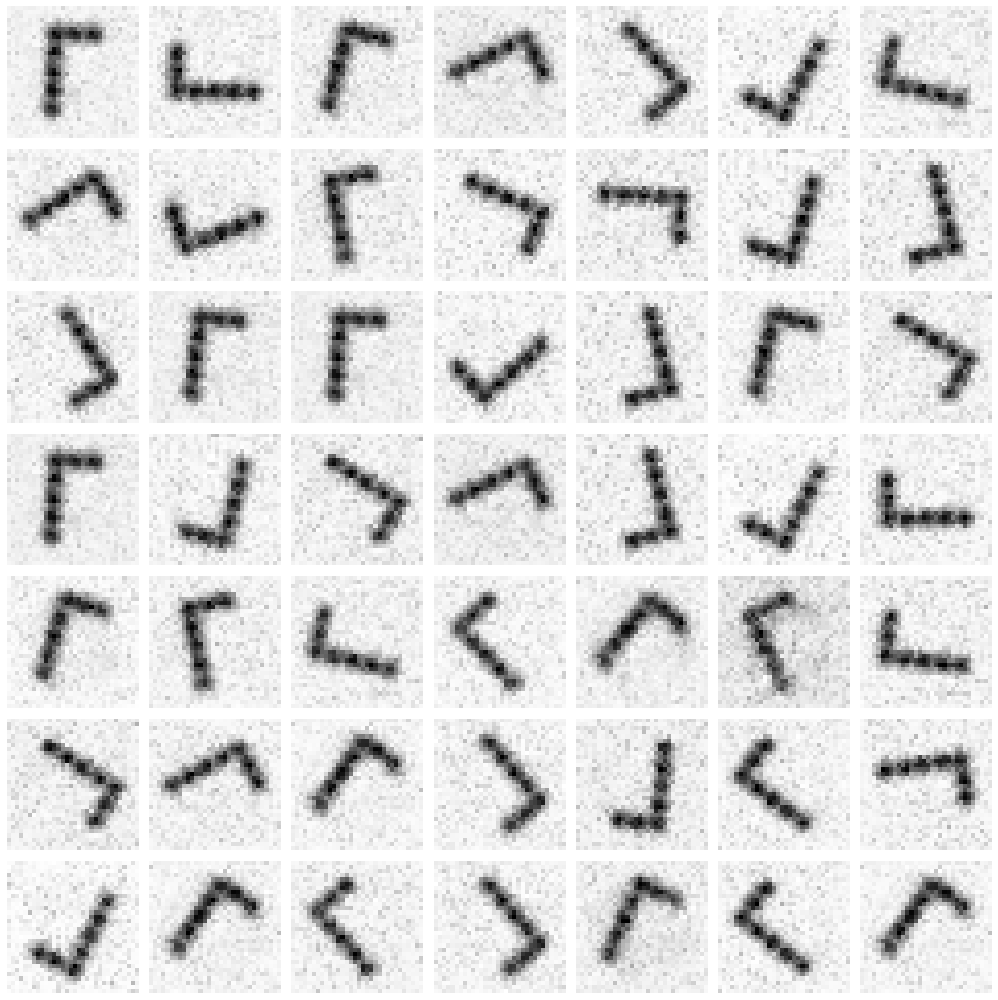

In [15]:
GG_images = G_A(G_B(images_tensor[0:49]))
GG_images = GG_images.reshape(49, 32, 32).detach().numpy()

fig, axs = plt.subplots(7, 7, figsize=(14, 14))

# Iterate over the images and plot them
for i, ax in enumerate(axs.flatten()):
    # Plot each image in grayscale
    ax.imshow(GG_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

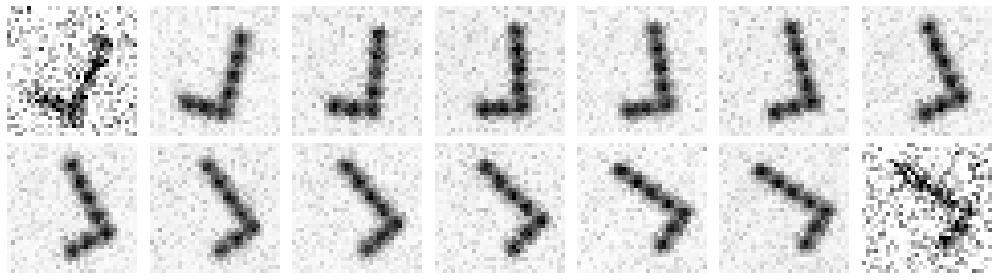

In [16]:
ind0 = 22
ind1 = 23

code0 = G_B(images_tensor[ind0]).view(1)
code1 = G_B(images_tensor[ind1]).view(1)

if code0 > code1:
    code0, code1 = code1, code0
    ind0, ind1 = ind1, ind0

inteps = torch.linspace(code0.item(), code1.item(), 12).view(12,1)
intep_images = G_A(inteps)
intep_images = intep_images.reshape(12, 32, 32).detach().numpy()

fig, axs = plt.subplots(2, 7, figsize=(14,4))
axs = axs.flatten()
axs[0].imshow(images[ind0], cmap='gray')
axs[0].axis('off')
axs[13].imshow(images[ind1], cmap='gray')
axs[13].axis('off')
# Iterate over the images and plot them
for i, ax in enumerate(axs[1:13]):
    # Plot each image in grayscale
    ax.imshow(intep_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()
